In [38]:
import numpy as np 
import matplotlib.pyplot as plt
import glob # This for helping me do the pictures 
import cv2 # this is for the color manipulation on the photos!
import os # operating system so I can pull in photos
import sklearn # allows us to use all the library below!
from sklearn import neighbors # for knn
from sklearn import metrics # to allow us to do the classification report 
from sklearn.metrics import accuracy_score # to print out the accuracy
from sklearn.model_selection import train_test_split # to train the MNIST dataset
from sklearn import svm # so we can so the support vector machine 
import matplotlib.pyplot as plt # so we plot the bar graph 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Used for the confusion matrix at the end
from sklearn.preprocessing import StandardScaler # To help me flatten the data into the right dimensions 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import BernoulliNB
import warnings # to ignore warnings
warnings.filterwarnings('ignore') 
from sklearn.svm import SVC
import time

sklearn.__version__ # I am running 1.0.2 

'1.0.2'

# Methods for the code

In [69]:
# # This is my image preprocessing for the datasets
def fruits(data, data_type, photo_type):
    list_of_img = []
    list_of_labels = []
    # Change this to match your path
    path = "../Code/fruits-360/" + data_type + "/"
    # Looping through i which is the label and j is the specific photo.
    for i, j in enumerate(data):
        # Add the path plus the photo
        p = path + j
        # glob.glob() is recursively finding 
        for x in glob.glob(os.path.join(p, "*.jpg")):
            # Read in the photo with a greyscale
            img = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
            # Resizing the photo to 28x28 because thats how the paper did theirs
            img = cv2.resize(img, (28, 28))
            if photo_type == 'Binary':
                img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
            # This kept it grey scale without it, the photo was not true greyscale
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            # This is to reduce the noise in the dataset
            img = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)
            list_of_img.append(img)
            list_of_labels.append(i)
                
    list_of_img = np.array(list_of_img)
    list_of_labels = np.array(list_of_labels)
        
    return list_of_img, list_of_labels
    
    
# This method purpose is to print out the fruits so we can see the difference in the what it looks like in 
# greyscale AND in binary greyscale
def printFruit(photo_type):
    # X and Y is being used to constantly show only the first 9 photos
    x = 0 
    y = 9
    while True:
        # This is checking to see if we printed the 10th fruit if so, break
        if x >= 4900:
            break
        fig, axs = plt.subplots(3, 3, figsize=(15,3))
        n = 0
        # The sets are seperated into their own training sets so calling them depending on the passed in value
        if photo_type == 'Gray':
            for i in range(0, 3):
                for j in range(0, 3):
                    axs[i, j].axis('on')
                    axs[i, j].imshow(X_training[x:y][n])
                    axs[i, j].set_title(fruit_data[t_training[x]])
                    n += 1 
        if photo_type == 'Binary':
            for i in range(0, 3):
                for j in range(0, 3):
                    axs[i, j].axis('on')
                    axs[i, j].imshow(X_training_binary[x:y][n])
                    axs[i, j].set_title(fruit_data[t_training_binary[x]])
                    n += 1 
        # Each dataset has 490 so adding 490 to go to the next set
        x += 490
        y += 490

# These were made because the numbers where printing on top of each other making the bar graphs unreadable
def addlabelsTrain(x,y):
    for i in range(len(x)):
        plt.text(i- 0.2, y[i], y[i])
        
def addlabelsTest(x,y):
    for i in range(len(x)):
        plt.text(i+ 0.1, y[i], y[i])

# Grey Photos

In [66]:
# The fruit I want to work with - all picked for their similar dataset size
fruit_data = ['Banana', 'Cocos', 'Mandarine', 'Pineapple', 'Raspberry', 'Dates', 'Apple Red Delicious', 'Cactus fruit', 'Clementine', 'Granadilla']

In [67]:
# TRaining the X_training and t_training on the training dataset
X_training, t_training = fruits(fruit_data, 'Training', 'Gray')

# X_test and t_test on the test dataset 
X_test, t_test = fruits(fruit_data, 'Test', "Gray")

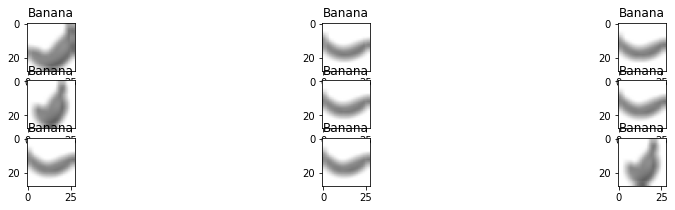

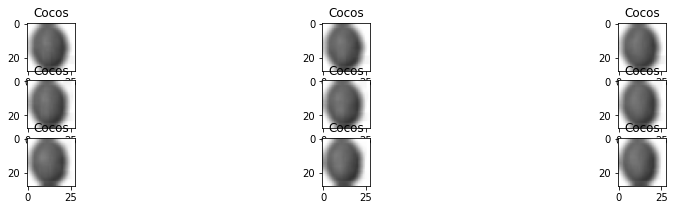

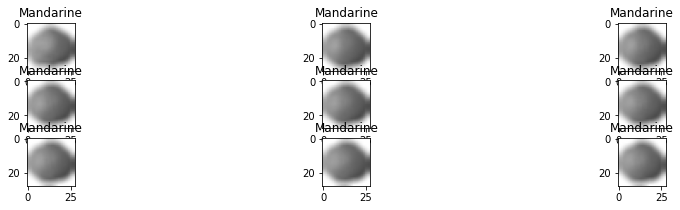

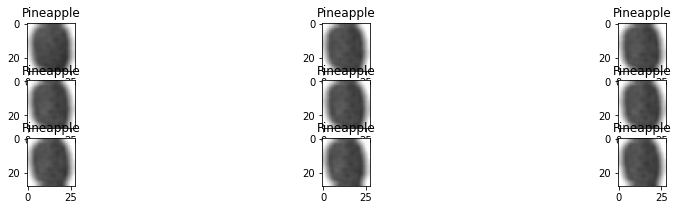

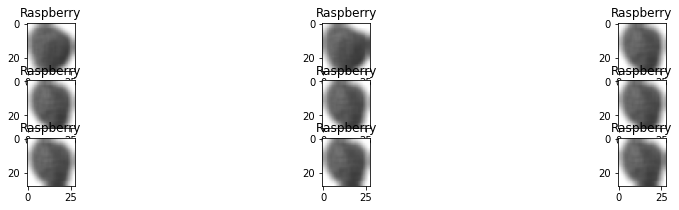

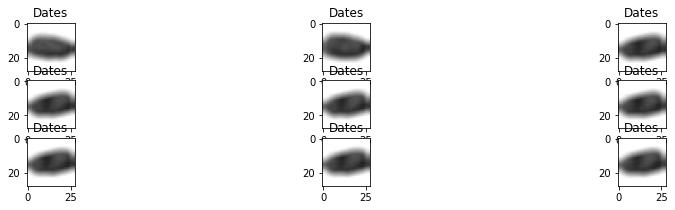

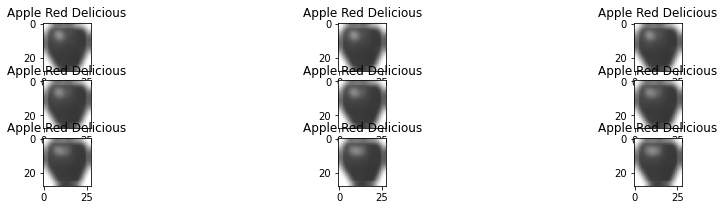

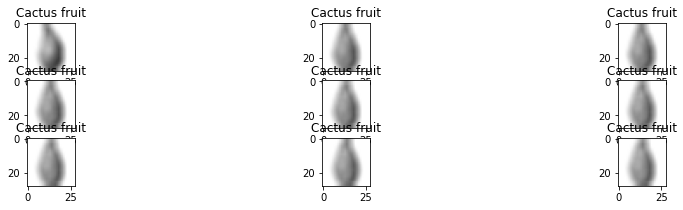

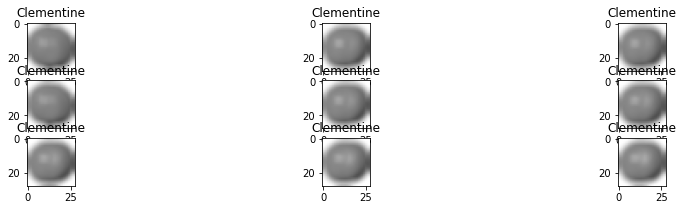

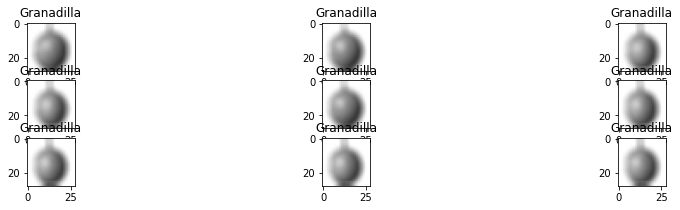

In [68]:
# Plotting the gray fruits
printFruit('Gray')

In [43]:
# Creating a standard scalar instance
scaler = StandardScaler()

# The reason I decided to use scaler is because without this, the dataset is not in the correct dimension so I am using the
# the fit_transform to first fit the data then transform it for every item in the list for X_training and X_test. 
X_training = scaler.fit_transform([i.flatten() for i in X_training])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

# Support Vector Machine

In [44]:
# To start the timer
start_time = time.time()

# Creating the support vector machine instance 
svm = SVC()

# Fitting the svm model
svm.fit(X_training, t_training) 

# Predicting the model 
predicted_svm = svm.predict(X_test)

# Training the model and printing out the scores 
train_score_svm = svm.score(X_training, t_training)
test_score_svm = svm.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_svm, test_score_svm))

# The Report to see exactly how the model is doing
print("\nClassification report for %s:\n%s\n" % (svm, metrics.classification_report(t_test, predicted_svm, target_names=fruit_data)))

# To print out how long it took to run
print("Grayscale SVC took", time.time() - start_time, "to run")

Train Accuracy: 0.9991836734693877, Test Accuracy: 0.9451807228915663

Classification report for SVC():
                     precision    recall  f1-score   support

             Banana       1.00      0.83      0.91       166
              Cocos       0.99      0.92      0.95       166
          Mandarine       1.00      0.82      0.90       166
          Pineapple       1.00      0.98      0.99       166
          Raspberry       0.92      0.99      0.96       166
              Dates       0.91      1.00      0.95       166
Apple Red Delicious       1.00      0.92      0.96       166
       Cactus fruit       0.82      1.00      0.90       166
         Clementine       0.88      1.00      0.94       166
         Granadilla       1.00      1.00      1.00       166

           accuracy                           0.95      1660
          macro avg       0.95      0.95      0.95      1660
       weighted avg       0.95      0.95      0.95      1660


Grayscale SVC took 20.049980878829956 

# Decision Tree

In [45]:
# To start the timer
start_time = time.time()

# Creating the decision tree classifier instance
dt = DecisionTreeClassifier()

# Fitting the data 
dt.fit(X_training, t_training)

# Predicting 
predicted_dt = dt.predict(X_test)

# Training the model
train_score_dt = dt.score(X_training, t_training)
test_score_dt = dt.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_dt, test_score_dt))

# Report
print("\nClassification report for %s:\n%s\n" % (dt, metrics.classification_report(t_test, predicted_dt, target_names=fruit_data)))


# To print out how long it took to run
print("Grayscale SVC took", time.time() - start_time, "to run")

Train Accuracy: 1.0, Test Accuracy: 0.7174698795180723

Classification report for DecisionTreeClassifier():
                     precision    recall  f1-score   support

             Banana       0.85      0.74      0.79       166
              Cocos       0.59      0.86      0.70       166
          Mandarine       0.69      0.91      0.79       166
          Pineapple       0.63      0.61      0.62       166
          Raspberry       0.94      0.30      0.45       166
              Dates       0.97      0.67      0.79       166
Apple Red Delicious       0.60      0.78      0.68       166
       Cactus fruit       0.69      0.83      0.75       166
         Clementine       0.86      0.48      0.61       166
         Granadilla       0.76      1.00      0.87       166

           accuracy                           0.72      1660
          macro avg       0.76      0.72      0.70      1660
       weighted avg       0.76      0.72      0.70      1660


Grayscale SVC took 3.1219983100891

# Naïve Bayes

In [46]:
# To start the timer
start_time = time.time()

# Creating the Gaussian instance
nb = BernoulliNB()

# Fitting the model
nb.fit(X_training, t_training)

# Training the model
train_score_nb = nb.score(X_training, t_training)
test_score_nb = nb.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_nb, test_score_nb))

# Prediciting the model
predicted_nb = nb.predict(X_test)

# Report
print("\nClassification report for %s:\n%s\n" % (nb, metrics.classification_report(t_test, predicted_nb, target_names=fruit_data, labels=t_training)))

# To print out how long it took to run
print("Grayscale BernoulliNB took", time.time() - start_time, "to run")

Train Accuracy: 0.7520408163265306, Test Accuracy: 0.6090361445783132

Classification report for BernoulliNB():
                     precision    recall  f1-score   support

             Banana       0.44      0.61      0.51       166
              Cocos       0.44      0.61      0.51       166
          Mandarine       0.44      0.61      0.51       166
          Pineapple       0.44      0.61      0.51       166
          Raspberry       0.44      0.61      0.51       166
              Dates       0.44      0.61      0.51       166
Apple Red Delicious       0.44      0.61      0.51       166
       Cactus fruit       0.44      0.61      0.51       166
         Clementine       0.44      0.61      0.51       166
         Granadilla       0.44      0.61      0.51       166

           accuracy                           0.61    813400
          macro avg       0.65      0.61      0.62    813400
       weighted avg       0.65      0.61      0.62    813400


Grayscale BernoulliNB took 0.2

# K-Nearest Neighbor

In [47]:
# To start the timer
start_time = time.time()

# Creating the KNN instance
knn = neighbors.KNeighborsClassifier()

# Fitting the model
knn.fit(X_training, t_training)

# Predicting the model
predicted_knn = knn.predict(X_test)

# Training the model
train_score_knn = knn.score(X_training, t_training)
test_score_knn = knn.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_knn, test_score_knn))

# Report
print("\nClassification report for %s:\n%s\n" % (knn, metrics.classification_report(t_test, predicted_knn, target_names=fruit_data)))

# To print out how long it took to run
print("Grayscale KNeighborsClassifier took", time.time() - start_time, "to run")

Train Accuracy: 0.9997959183673469, Test Accuracy: 0.939156626506024

Classification report for KNeighborsClassifier():
                     precision    recall  f1-score   support

             Banana       0.96      0.80      0.88       166
              Cocos       0.98      0.90      0.94       166
          Mandarine       1.00      0.84      0.91       166
          Pineapple       1.00      0.96      0.98       166
          Raspberry       0.90      1.00      0.95       166
              Dates       0.95      1.00      0.97       166
Apple Red Delicious       0.97      0.91      0.94       166
       Cactus fruit       0.82      0.98      0.89       166
         Clementine       0.86      1.00      0.93       166
         Granadilla       1.00      1.00      1.00       166

           accuracy                           0.94      1660
          macro avg       0.95      0.94      0.94      1660
       weighted avg       0.95      0.94      0.94      1660


Grayscale KNeighborsCl

# Random Forest

In [48]:
# To start the timer
start_time = time.time()

# Creating the Random Forest instance
rf = RandomForestClassifier(n_estimators=9)

# Fitting the data 
rf.fit(X_training, t_training)

# Predicting
predicted_rf = rf.predict(X_test)

# Training the model
train_score_rf = rf.score(X_training, t_training)
test_score_rf = rf.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_rf, test_score_rf))

# Report
print("\nClassification report for %s:\n%s\n" % (rf, metrics.classification_report(t_test, predicted_rf, target_names=fruit_data)))

# To print out how long it took to run
print("Grayscale RandomForestClassifier took", time.time() - start_time, "to run")

Train Accuracy: 1.0, Test Accuracy: 0.8891566265060241

Classification report for RandomForestClassifier(n_estimators=9):
                     precision    recall  f1-score   support

             Banana       0.96      0.81      0.88       166
              Cocos       0.79      0.93      0.85       166
          Mandarine       1.00      0.95      0.97       166
          Pineapple       0.88      0.95      0.91       166
          Raspberry       0.97      0.75      0.84       166
              Dates       0.95      0.99      0.97       166
Apple Red Delicious       0.99      0.93      0.96       166
       Cactus fruit       0.69      0.83      0.75       166
         Clementine       0.93      0.76      0.84       166
         Granadilla       0.84      1.00      0.91       166

           accuracy                           0.89      1660
          macro avg       0.90      0.89      0.89      1660
       weighted avg       0.90      0.89      0.89      1660


Grayscale RandomFore

# Accuracy graph

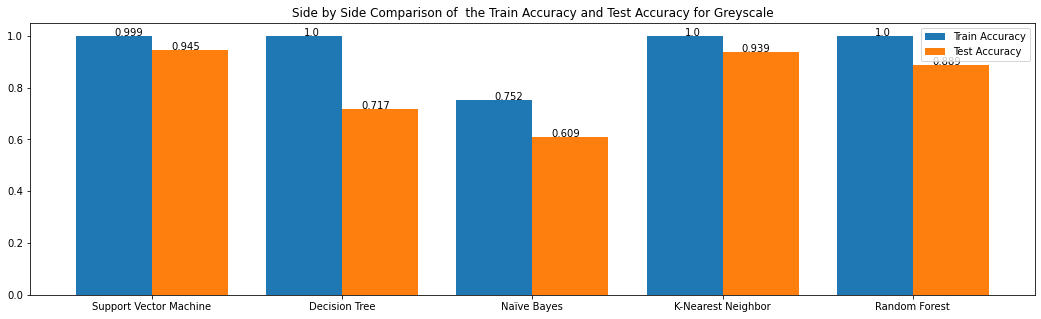

In [49]:
models = [svm, dt, nb, knn, rf] # To pass in the models that was created in each section

# This is to create a better visual name for each
names = ["Support Vector Machine", "Decision Tree", "Naïve Bayes", "K-Nearest Neighbor", "Random Forest"]

# Saving each of the train_scores and test_scores created in each 
train_accs = [train_score_svm, train_score_dt, train_score_nb, train_score_knn, train_score_rf]
test_accs = [test_score_svm, test_score_dt, test_score_nb, test_score_knn, test_score_rf]

# Arranging the names of the bar graph
X_axis_test = np.arange(len(names))

# Increasing the size, otherwise the x-axis is unreadable 
f, ax = plt.subplots(figsize=(18,5))
ax.set_title('Side by Side Comparison of  the Train Accuracy and Test Accuracy for Greyscale')

# rounding the numbers because otherwise it is unreadable
for i in range(len(train_accs)):
    train_accs[i] = round(train_accs[i], 3)
    
for i in range(len(test_accs)):
    test_accs[i] = round(test_accs[i], 3)

plt.bar(X_axis_test - 0.2, train_accs, 0.4, label = 'Train Accuracy',)
addlabelsTrain(X_axis_test - 0.2, train_accs)


plt.bar(X_axis_test + 0.2, test_accs, 0.4, label = 'Test Accuracy')
addlabelsTest(X_axis_test + 0.2, test_accs)

  
plt.xticks(X_axis_test, names)
plt.legend()
plt.show()

# Confusion Matrix

Model: Support Vector Machine


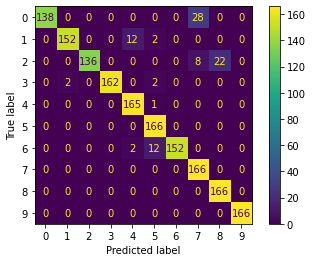

Model: Decision Tree


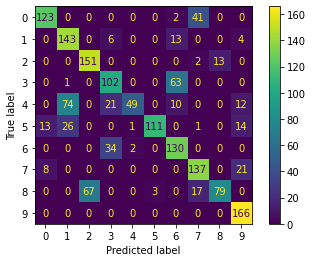

Model: Naïve Bayes


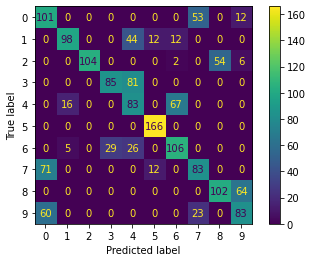

Model: K-Nearest Neighbor


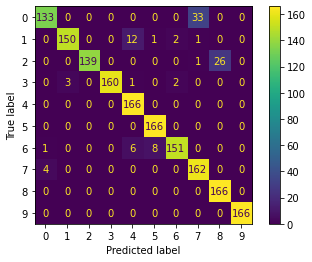

Model: Random Forest


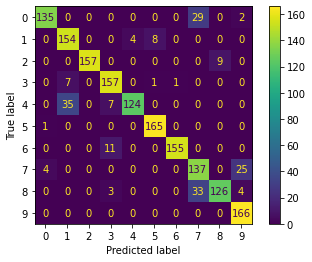

In [50]:
# Plotting Confusion matrix for each of our models to see where each is messing up
for name, model in zip(names, models):
    predictions = model.predict(X_test)
    
    cm = confusion_matrix(t_test, predictions, labels=model.classes_)
    print("Model:", name)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot()

    plt.show()

###### 

# Binary Code

In [70]:
# We are training now on the binary dataset
X_training_binary, t_training_binary = fruits(fruit_data, 'Training', 'Binary')
X_test_binary, t_test_binary = fruits(fruit_data, 'Test', 'Binary')

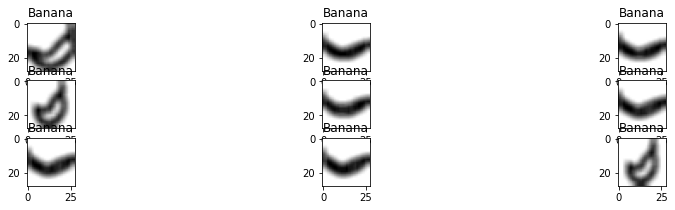

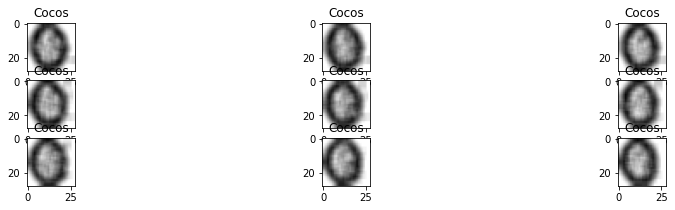

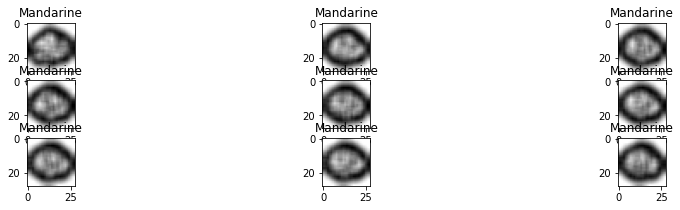

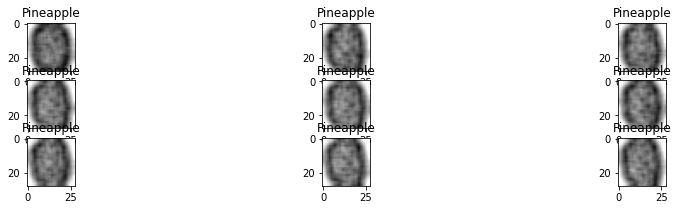

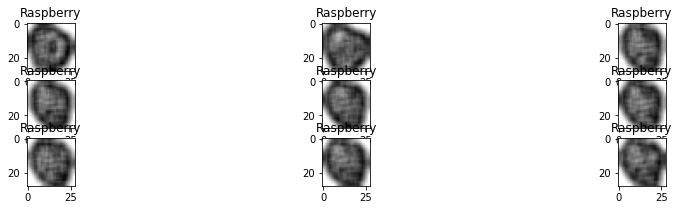

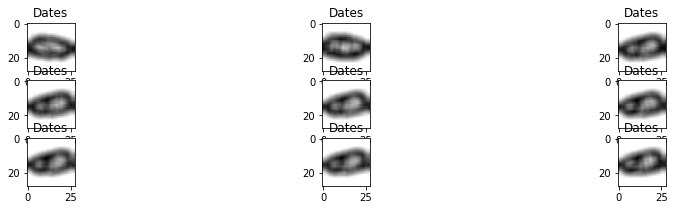

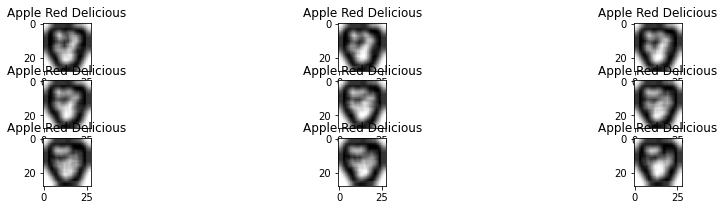

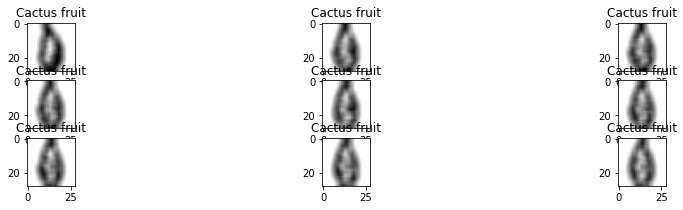

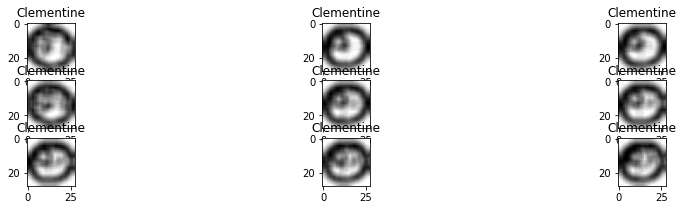

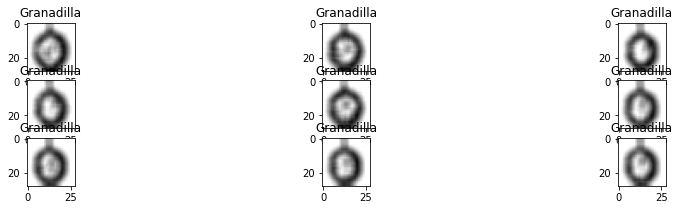

In [71]:
# Showing you what this fruit looks like for the dataset. 
printFruit('Binary')

In [53]:
# Creating a standard scalar instance
scaler = StandardScaler()

# Doing the same but for the binary dataset now!
X_training_binary = scaler.fit_transform([i.flatten() for i in X_training_binary])
X_test_binary = scaler.fit_transform([i.flatten() for i in X_test_binary])

# Support Vector Machine

In [54]:
# To start the timer
start_time = time.time()

# Creating the Support vector machine instance 
svm_binary = SVC()

# Fit the data 
svm_binary.fit(X_training_binary, t_training_binary) 

# Predicting the data 
predicted_svm_binary = svm_binary.predict(X_test_binary)

# Training the data 
train_score_svm_binary = svm_binary.score(X_training_binary, t_training_binary)
test_score_svm_binary = svm_binary.score(X_test_binary, t_test_binary)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_svm_binary, test_score_svm_binary))

# Report 
print("\nClassification report for classifier %s:\n%s\n" % (svm_binary, metrics.classification_report(t_test_binary, predicted_svm_binary, target_names=fruit_data)))

# To print out how long it took to run
print("Binary SVC took", time.time() - start_time, "to run")

Train Accuracy: 0.9995918367346939, Test Accuracy: 0.9174698795180722

Classification report for classifier SVC():
                     precision    recall  f1-score   support

             Banana       0.94      0.78      0.85       166
              Cocos       0.95      0.93      0.94       166
          Mandarine       1.00      0.80      0.89       166
          Pineapple       0.99      0.93      0.96       166
          Raspberry       0.95      0.98      0.96       166
              Dates       0.79      1.00      0.89       166
Apple Red Delicious       1.00      0.98      0.99       166
       Cactus fruit       0.79      0.77      0.78       166
         Clementine       0.89      1.00      0.94       166
         Granadilla       0.94      1.00      0.97       166

           accuracy                           0.92      1660
          macro avg       0.92      0.92      0.92      1660
       weighted avg       0.92      0.92      0.92      1660


Binary SVC took 28.25299739

# Decision Tree

In [55]:
# To start the timer
start_time = time.time()

# Creating the decision tree classifer instance
dt_binary = DecisionTreeClassifier()

# Fit the data
dt_binary.fit(X_training_binary, t_training_binary)

# Predicting the data
predicted_dt_binary = dt_binary.predict(X_test_binary)

# Training the data 
train_score_dt_binary = dt_binary.score(X_training_binary, t_training_binary)
test_score_dt_binary = dt_binary.score(X_test_binary, t_test_binary)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_dt_binary, test_score_dt_binary))

# Report
print("\nClassification report for %s:\n%s\n" % (dt_binary, metrics.classification_report(t_test_binary, predicted_dt_binary, target_names=fruit_data)))

# To print out how long it took to run
print("Binary DecisionTreeClassifier SVC took", time.time() - start_time, "to run")

Train Accuracy: 1.0, Test Accuracy: 0.6765060240963855

Classification report for DecisionTreeClassifier():
                     precision    recall  f1-score   support

             Banana       0.86      0.19      0.32       166
              Cocos       0.55      0.59      0.57       166
          Mandarine       0.66      0.61      0.63       166
          Pineapple       0.63      0.79      0.70       166
          Raspberry       0.77      0.57      0.66       166
              Dates       0.60      0.88      0.71       166
Apple Red Delicious       0.77      0.87      0.82       166
       Cactus fruit       0.56      0.73      0.64       166
         Clementine       0.84      0.53      0.65       166
         Granadilla       0.80      1.00      0.89       166

           accuracy                           0.68      1660
          macro avg       0.70      0.68      0.66      1660
       weighted avg       0.70      0.68      0.66      1660


Binary DecisionTreeClassifier SVC 

# Naïve Bayes

In [56]:
# To start the timer
start_time = time.time()

# Creating the Gaussian instance 
nb_binary = BernoulliNB()

# Fitting the data 
nb_binary.fit(X_training_binary, t_training_binary)

# Training the daa 
train_score_nb_binary = nb_binary.score(X_training_binary, t_training_binary)
test_score_nb_binary = nb_binary.score(X_test_binary, t_test_binary)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_nb_binary, test_score_nb_binary))

# Predicting the data 
predicted_nb_binary = nb_binary.predict(X_test_binary)

# Report 
print("\nClassification report for %s:\n%s\n" % (nb_binary, metrics.classification_report(t_test_binary, predicted_nb_binary, target_names=fruit_data)))

# To print out how long it took to run
print("Binary BernoulliNB SVC took", time.time() - start_time, "to run")

Train Accuracy: 0.7228571428571429, Test Accuracy: 0.5765060240963855

Classification report for BernoulliNB():
                     precision    recall  f1-score   support

             Banana       0.39      0.61      0.48       166
              Cocos       0.54      0.78      0.64       166
          Mandarine       0.79      0.66      0.72       166
          Pineapple       0.82      0.50      0.62       166
          Raspberry       0.43      0.50      0.46       166
              Dates       0.65      0.48      0.55       166
Apple Red Delicious       0.62      0.73      0.67       166
       Cactus fruit       0.40      0.50      0.45       166
         Clementine       0.71      0.51      0.59       166
         Granadilla       0.91      0.50      0.65       166

           accuracy                           0.58      1660
          macro avg       0.63      0.58      0.58      1660
       weighted avg       0.63      0.58      0.58      1660


Binary BernoulliNB SVC took 0.

# K-Nearest Neighbor

In [57]:
# To start the timer
start_time = time.time()

# Creating the KNN instance 
knn_binary = neighbors.KNeighborsClassifier()

# Fitting the data 
knn_binary.fit(X_training_binary, t_training_binary)

# Prediciting the data 
predicted_knn_binary = knn_binary.predict(X_test_binary)

# Training the data 
train_score_knn_binary = knn_binary.score(X_training_binary, t_training_binary)
test_score_knn_binary = knn_binary.score(X_test_binary, t_test_binary)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_knn_binary, test_score_knn_binary))

# Report
print("\nClassification report for %s:\n%s\n" % (knn_binary, metrics.classification_report(t_test_binary, predicted_knn_binary, target_names=fruit_data)))

# To print out how long it took to run
print("Binary KNeighborsClassifier SVC took", time.time() - start_time, "to run")

Train Accuracy: 1.0, Test Accuracy: 0.9192771084337349

Classification report for KNeighborsClassifier():
                     precision    recall  f1-score   support

             Banana       1.00      0.77      0.87       166
              Cocos       0.96      0.93      0.95       166
          Mandarine       1.00      0.80      0.89       166
          Pineapple       0.99      0.96      0.98       166
          Raspberry       0.92      1.00      0.96       166
              Dates       0.83      1.00      0.90       166
Apple Red Delicious       1.00      0.95      0.97       166
       Cactus fruit       0.77      0.80      0.78       166
         Clementine       0.85      1.00      0.92       166
         Granadilla       0.95      1.00      0.98       166

           accuracy                           0.92      1660
          macro avg       0.93      0.92      0.92      1660
       weighted avg       0.93      0.92      0.92      1660


Binary KNeighborsClassifier SVC took

# Random Forest

In [58]:
# To start the timer
start_time = time.time()

# Creating the random forst classifier instance 
rf_binary = RandomForestClassifier(n_estimators=9)

# Fitting the data 
rf_binary.fit(X_training_binary, t_training_binary)

# Training the data
train_score_rf_binary = rf_binary.score(X_training_binary, t_training_binary)
test_score_rf_binary = rf_binary.score(X_test_binary, t_test_binary)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_rf_binary, test_score_rf_binary))

# Predicting the data
predicted_rf_binary = rf_binary.predict(X_test_binary)

# Report
print("\nClassification report for %s:\n%s\n" % (rf_binary, metrics.classification_report(t_test_binary, predicted_rf_binary, target_names=fruit_data)))

# To print out how long it took to run
print("Binary RandomForestClassifier SVC took", time.time() - start_time, "to run")

Train Accuracy: 0.9995918367346939, Test Accuracy: 0.8518072289156626

Classification report for RandomForestClassifier(n_estimators=9):
                     precision    recall  f1-score   support

             Banana       0.88      0.73      0.80       166
              Cocos       0.79      0.89      0.84       166
          Mandarine       0.94      0.82      0.87       166
          Pineapple       0.89      0.92      0.90       166
          Raspberry       0.91      0.81      0.86       166
              Dates       0.72      0.90      0.80       166
Apple Red Delicious       0.83      0.98      0.90       166
       Cactus fruit       0.75      0.70      0.72       166
         Clementine       0.93      0.78      0.85       166
         Granadilla       0.95      1.00      0.98       166

           accuracy                           0.85      1660
          macro avg       0.86      0.85      0.85      1660
       weighted avg       0.86      0.85      0.85      1660


Binar

# Binary Graphs

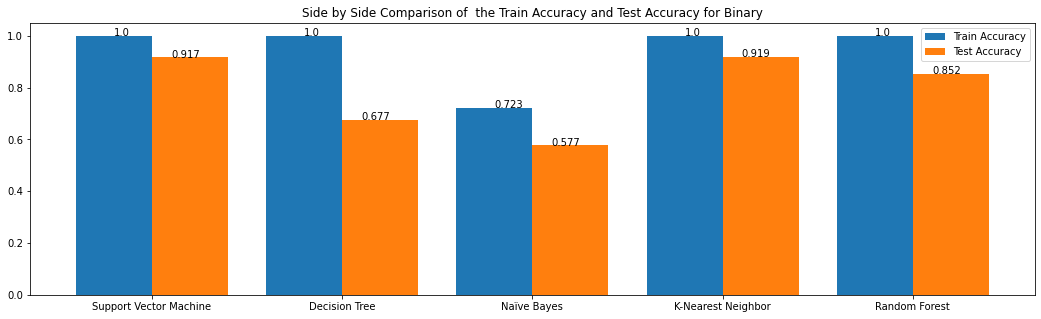

In [59]:
models = [svm_binary, dt_binary, nb_binary, knn_binary, rf_binary] # To pass in the models that was created in each section

# This is to create a better visual name for each
names = ["Support Vector Machine", "Decision Tree", "Naïve Bayes", "K-Nearest Neighbor", "Random Forest"]

# Saving each of the train_scores and test_scores created in each 
train_accs = [train_score_svm_binary, train_score_dt_binary, \
              train_score_nb_binary, train_score_knn_binary, train_score_rf_binary]
test_accs = [test_score_svm_binary, test_score_dt_binary, \
             test_score_nb_binary, test_score_knn_binary, test_score_rf_binary]

# Arranging the names of the bar graph
X_axis_test = np.arange(len(names))

# Increasing the size, otherwise the x-axis is unreadable 
f, ax = plt.subplots(figsize=(18,5))
ax.set_title('Side by Side Comparison of  the Train Accuracy and Test Accuracy for Binary')

# rounding the numbers because otherwise it is unreadable
for i in range(len(train_accs)):
    train_accs[i] = round(train_accs[i], 3)
    
for i in range(len(test_accs)):
    test_accs[i] = round(test_accs[i], 3)

plt.bar(X_axis_test - 0.2, train_accs, 0.4, label = 'Train Accuracy',)
addlabelsTrain(X_axis_test - 0.2, train_accs)


plt.bar(X_axis_test + 0.2, test_accs, 0.4, label = 'Test Accuracy')
addlabelsTest(X_axis_test + 0.2, test_accs)

  
plt.xticks(X_axis_test, names)
plt.legend()
plt.show()

# Confusion Matrix

Model: Support Vector Machine


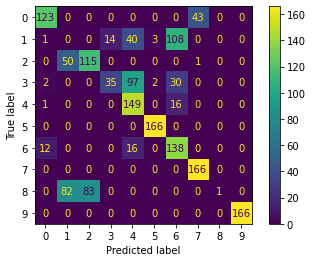

Model: Decision Tree


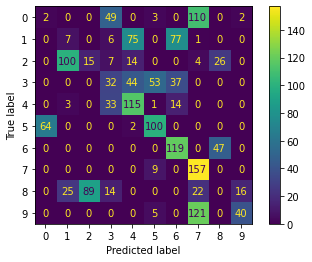

Model: Naïve Bayes


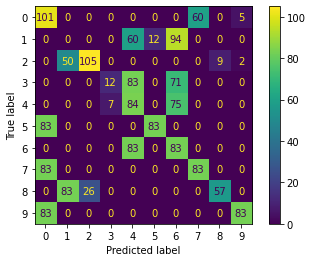

Model: K-Nearest Neighbor


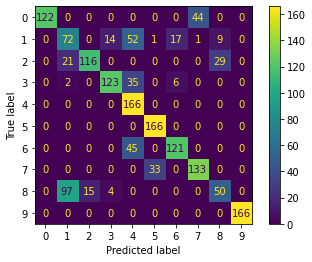

Model: Random Forest


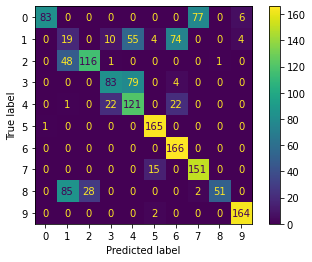

In [60]:
# Plotting Confusion matrix for each of our models to see where each is messing up
for name, model in zip(names, models):
    predictions = model.predict(X_test)
    
    cm = confusion_matrix(t_test_binary, predictions, labels=model.classes_)
    print("Model:", name)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot()

    plt.show()